<a href="https://colab.research.google.com/github/mhmod2222/road_sgns_recog/blob/master/traffic_sign_recognition_leNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
!ls german-traffic-signs # *.p is a pickle file (pickling is serializing data that can be unpickled when desired)

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f: # reading in binary format
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

#print(type(train_data))
X_train, y_train = train_data['features'], train_data['labels'] # x and y respectively
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 3"

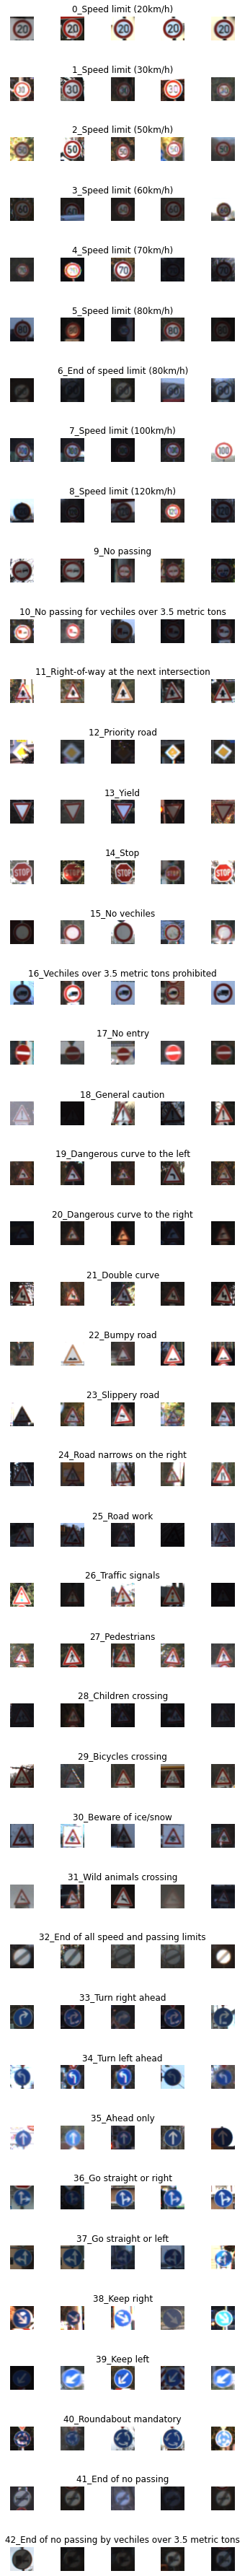

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
#print(data)

num_of_samples = []
cols = 5
num_classes = 43 # we have 43 signs in the training data  (data.iterrows()) --> (index, class_name)

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap = plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + "_" + row["SignName"])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


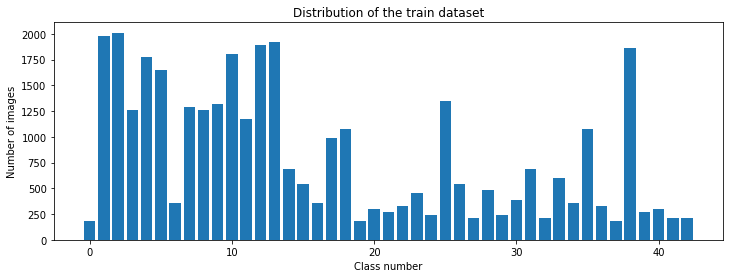

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


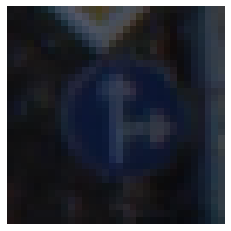

In [ ]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


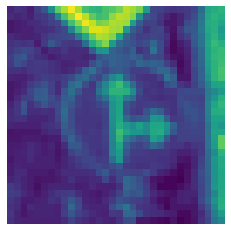

In [ ]:
import cv2

def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return img

image1 = grayscale(X_train[1000])
plt.imshow(image1)
plt.axis("off")

print(image1.shape)

(32, 32)


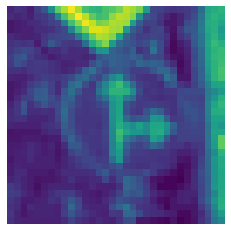

In [ ]:
def equalize(img):
  cv2.equalizeHist(img)
  return img

image2 = equalize(image1)
plt.imshow(image2)
plt.axis("off")
print(image2.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


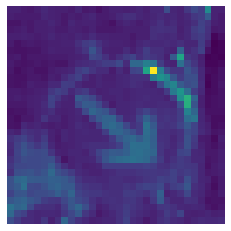

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)
datagen.fit(X_train)

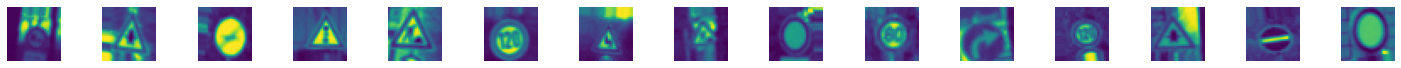

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis("off")

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
def modified_leNet_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = modified_leNet_model()
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 4, 4, 30)        

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data = (X_val, y_val), shuffle = 1)

2000/2000 [==============================] - 1038s 519ms/step - loss: 0.4972 - accuracy: 0.8478 - val_loss: 0.0844 - val_accuracy: 0.9755
Epoch 3/10
2000/2000 [==============================] - 1027s 513ms/step - loss: 0.3247 - accuracy: 0.9020 - val_loss: 0.0666 - val_accuracy: 0.9803
Epoch 4/10
2000/2000 [==============================] - 1036s 518ms/step - loss: 0.2570 - accuracy: 0.9226 - val_loss: 0.0612 - val_accuracy: 0.9803
Epoch 5/10
2000/2000 [==============================] - 1032s 516ms/step - loss: 0.2162 - accuracy: 0.9346 - val_loss: 0.0511 - val_accuracy: 0.9825
Epoch 6/10
2000/2000 [==============================] - 1031s 516ms/step - loss: 0.1943 - accuracy: 0.9417 - val_loss: 0.0700 - val_accuracy: 0.9816
Epoch 7/10
2000/2000 [==============================] - 1037s 519ms/step - loss: 0.1732 - accuracy: 0.9488 - val_loss: 0.0374 - val_accuracy: 0.9882
Epoch 8/10
2000/2000 [==============================] - 1040s 520ms/step - loss: 0.1630 - accuracy: 0.9511 - val_loss

Text(0.5, 0, 'epoch')

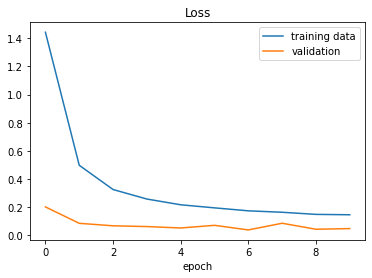

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training data', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

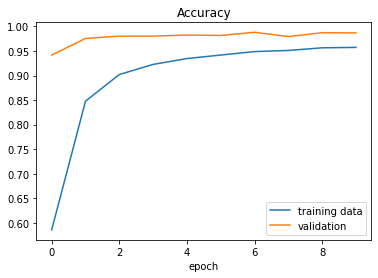

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training data', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])


Test Score: 0.13296463973859843
Test Accuracy: 0.9700712561607361


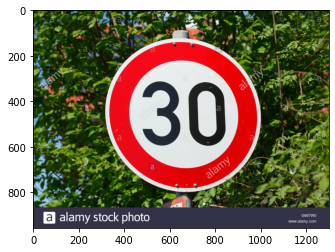

In [ ]:
#fetch image
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


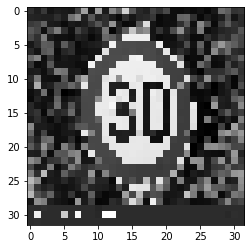

In [ ]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)

In [ ]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]
